<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220612_mtcars_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------------------------------------------------------------
20220612일 숙제<br>
**1.1** 4기통인 자동차의 백분율을 구하시오<br>
**1.2** 변속 기어수가 4이고, 수동 변속기인 데이터에서 자동차 연비의 평균값과 마력의 표준편차의 합계를 구하시오<br>
**1.3** hp 값을 예측하기 위한 분석을 실시하시오(lm, glm 2가지).

----------------------------------------------------------------------------

# 1. 라이브러리 및 데이터 로드

In [1]:
install.packages(c("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","ggplot2","pacman","esquisse"))
pacman::p_load("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","pacman","esquisse")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘esquissee’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘Rcpp’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘conflicted’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘esquissee’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,

In [37]:
df=mtcars

# 2. BASIC EDA

In [ ]:
#install.packages("esquisse")
#library(esquisse)

In [6]:
install.packages("DataExplorer")
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘networkD3’




In [7]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             32    
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
 1 mpg                   0             1  20.1     6.03  10.4   15.4   19.2 
 2 cyl                   0             1   6.19    1.79   4      4      6   
 3 disp                  0             1 231.    124.    71.1  121.   196.  
 4 hp                    0             1 147.     68.6   52     96.5  123   
 5 drat                  0             1   3.60    0.535  2.76   3.08   3.70
 6 wt                    0             1   3.22    0.978  1.51   2.58   3.32
 7 qsec                  0      

In [9]:
glimpse(df)

Rows: 32
Columns: 11
$ mpg  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,…
$ cyl  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8,…
$ disp <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8, 16…
$ hp   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180…
$ drat <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3.92,…
$ wt   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.…
$ qsec <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90, 18…
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,…
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,…
$ gear <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,…
$ carb <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1, 2,…


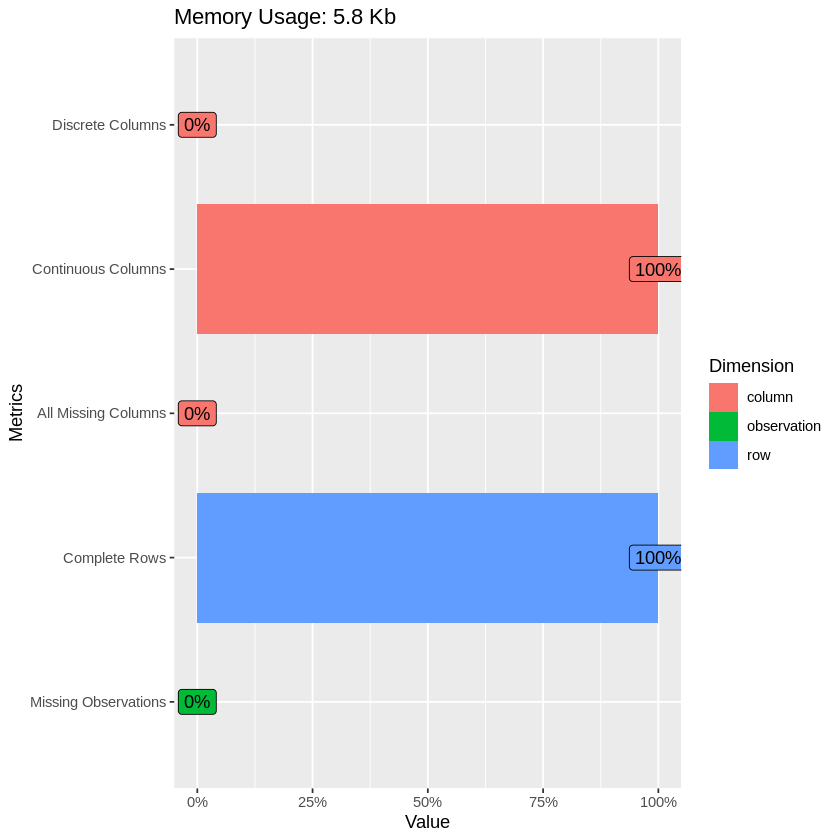

In [13]:
plot_intro(df)

1. NA없음
2. 모두 int로 저장됨

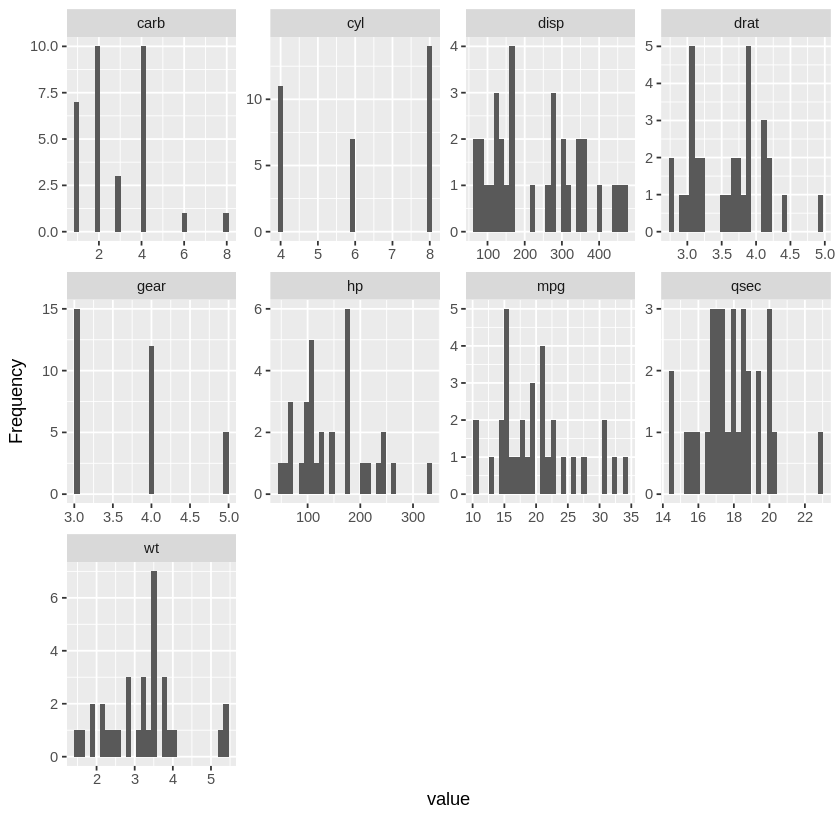

In [12]:
plot_histogram(df)

- carb, cyl, gear 변수 클래스 비율 확인 가능

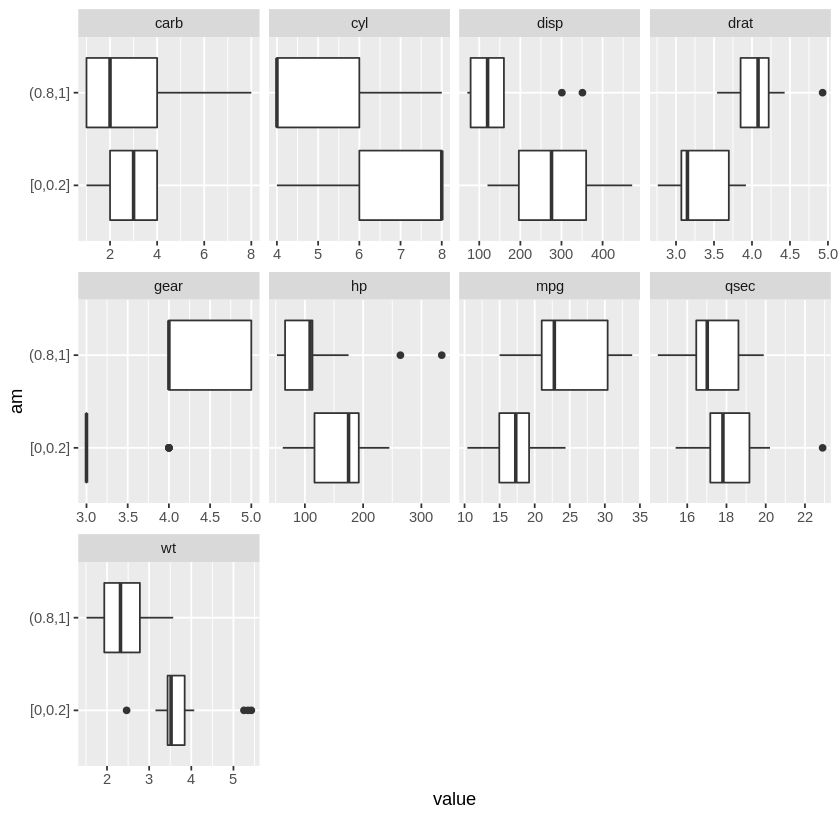

In [19]:
plot_boxplot(df, by="am")

* 변속기 유형에 따른 박스플랏
* factor변환 안함
* 변속기 유형 (자동,수동) 에 영향 미치는 변수는 carb(자동차 기화기 수), qsec(도달시간) 제외하고 대부분

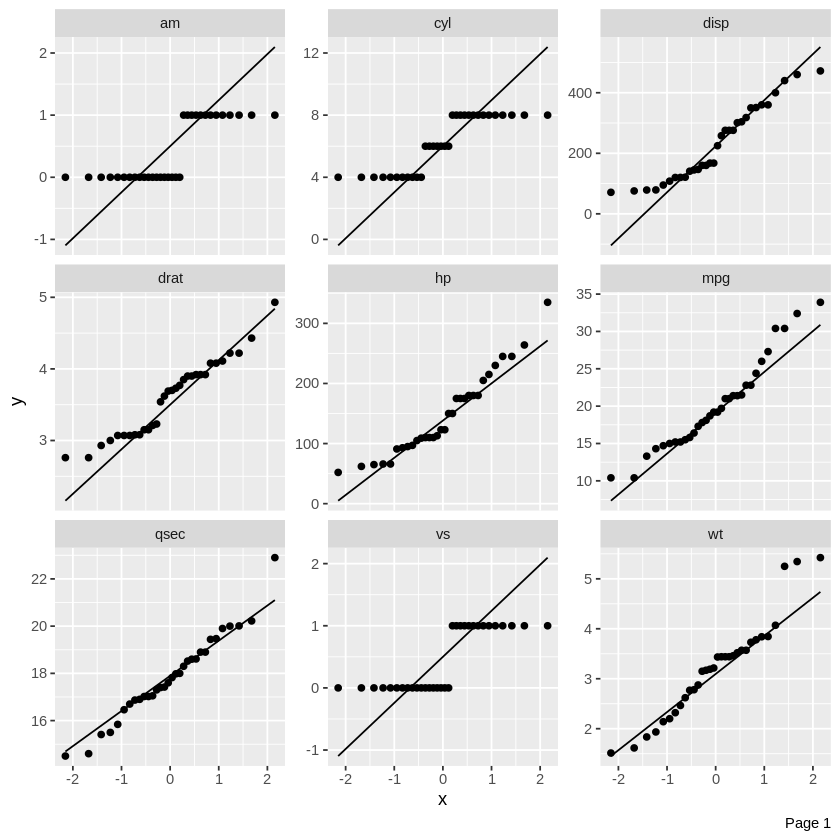

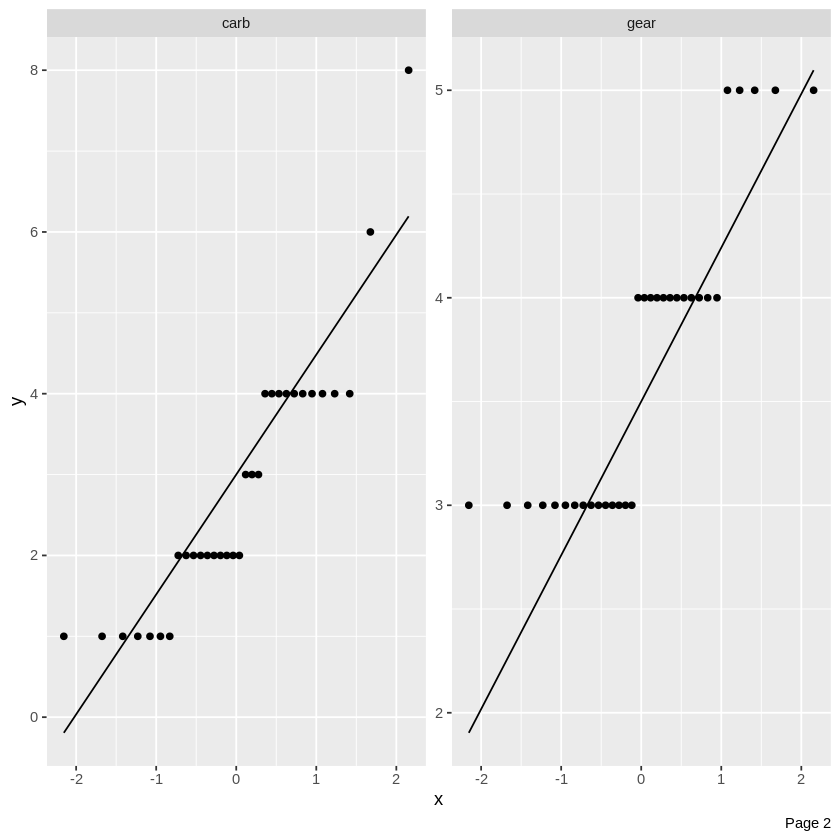

In [15]:
plot_qq(df)

* discrete 제외한 변수 모두 정규성 만족 확인

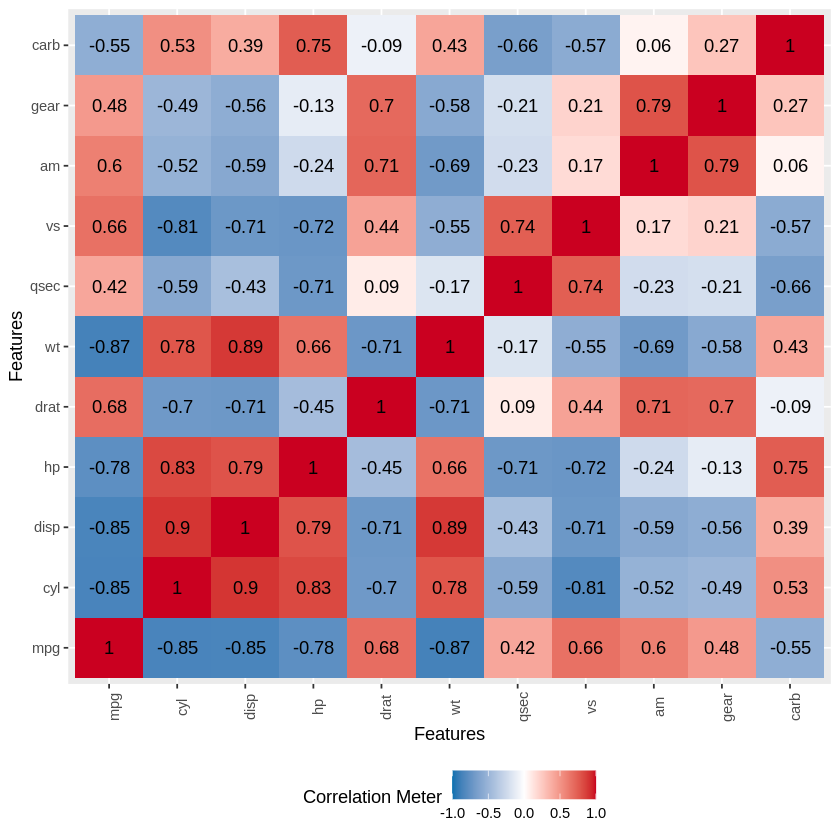

In [20]:
plot_correlation(na.omit(df))

- `hp와 높은 상관관계 있는 변수`: cyl(0.83), disp(0.79), carb(0.75), wt(0.66) 중요변수 예상
-  그 외 wt와 disp 사용한 파생 변수 생성 가능성 
- gear, am, draft로도 가능

In [ ]:
#install.packages("corrplot")
#library(corrplot)

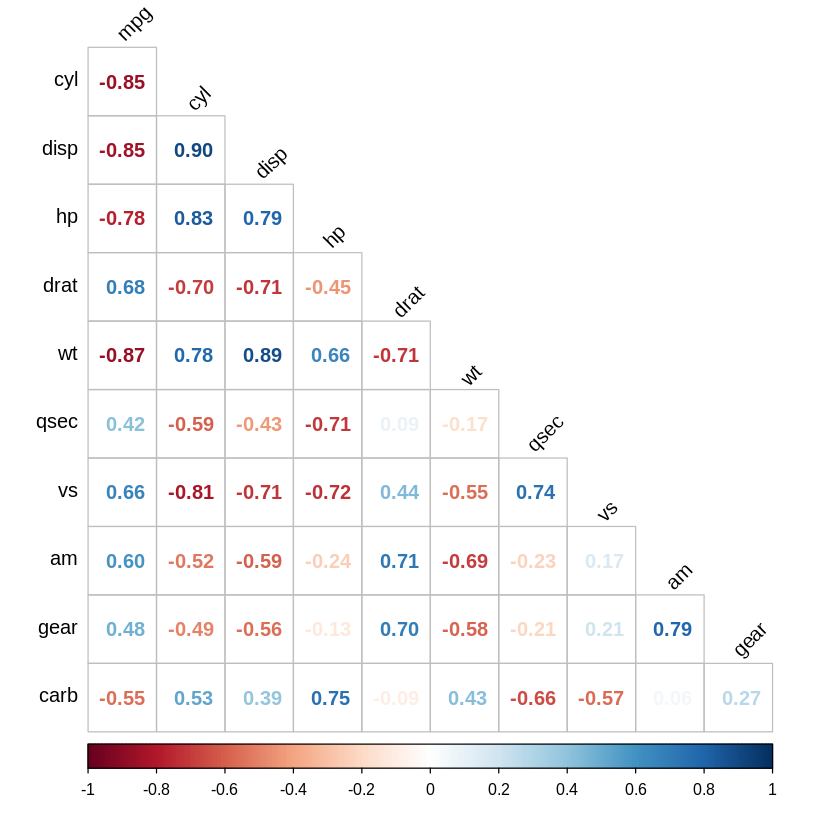

In [29]:
cor=cor(df)
corrplot(cor, method="number", type="lower", diag=FALSE, tl.col="black", tl.srt = 45)

1. 가장 높은 상관관계가 있는 변수 cyl(0.83)는 discrete변수로  클래스가 3개인 팩터형으로 볼 수 있음
2. carb 역시 클래스 8개인 팩터로 볼 수 있음
2. 이에 추가 EDA 진행
3. 분포 확인후 hp에 대한 범주 생성





In [57]:
#skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             32    
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
 1 mpg                   0             1  20.1     6.03  10.4   15.4   19.2 
 2 cyl                   0             1   6.19    1.79   4      4      6   
 3 disp                  0             1 231.    124.    71.1  121.   196.  
 4 hp                    0             1 147.     68.6   52     96.5  123   
 5 drat                  0             1   3.60    0.535  2.76   3.08   3.70
 6 wt                    0             1   3.22    0.978  1.51   2.58   3.32
 7 qsec                  0      

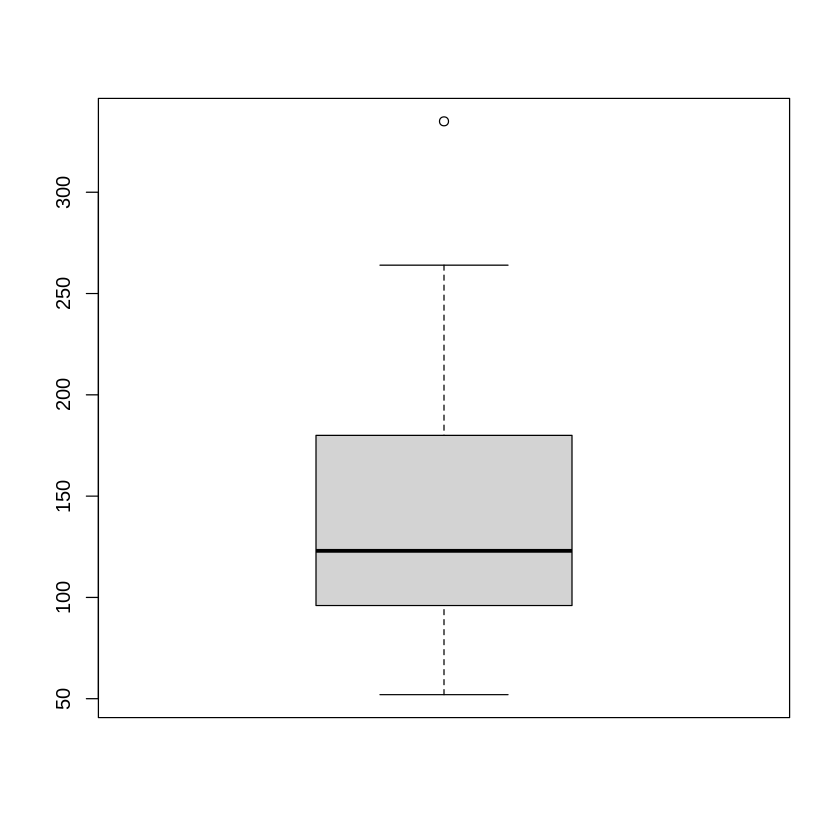

In [31]:
boxplot(df$hp)

In [61]:
df %>% mutate(
          cyl=as.factor(cyl), 
          carb=as.factor(carb),
          hp= case_when(
                              hp < 96.5 ~ "low",
                              hp >=96.5 & hp <=180  ~ "average",
                              TRUE ~ "high")
      ) -> p_df

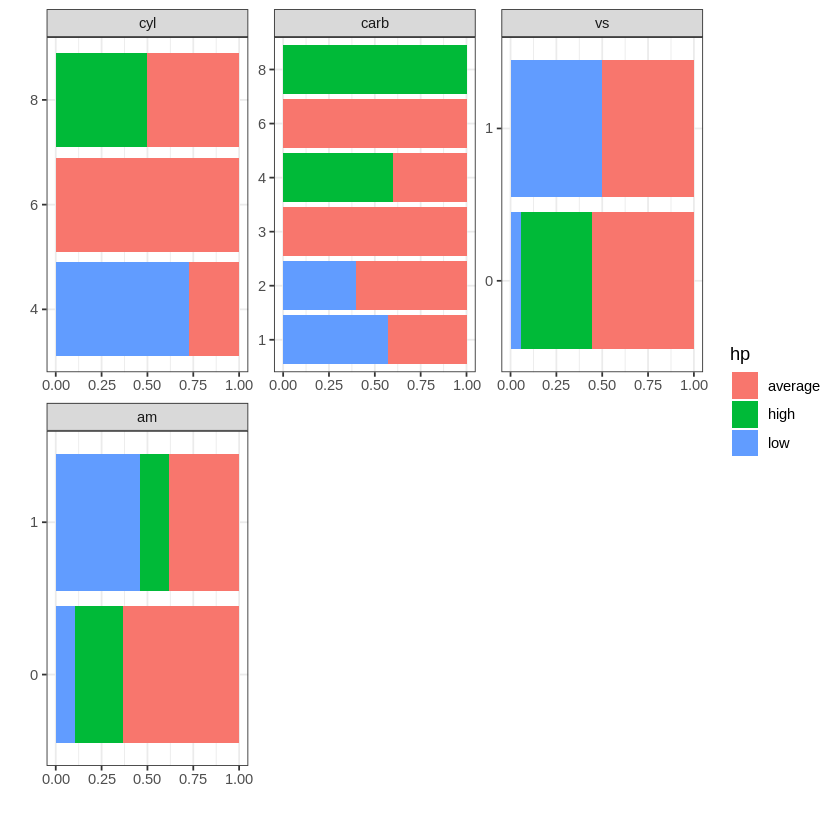

In [62]:
plot_bar(p_df,by ='hp', order_bar = FALSE,
              ggtheme = theme_bw())
#order_bar=FALSE

- cyl, carb가 클수록 hp 높은거 확인

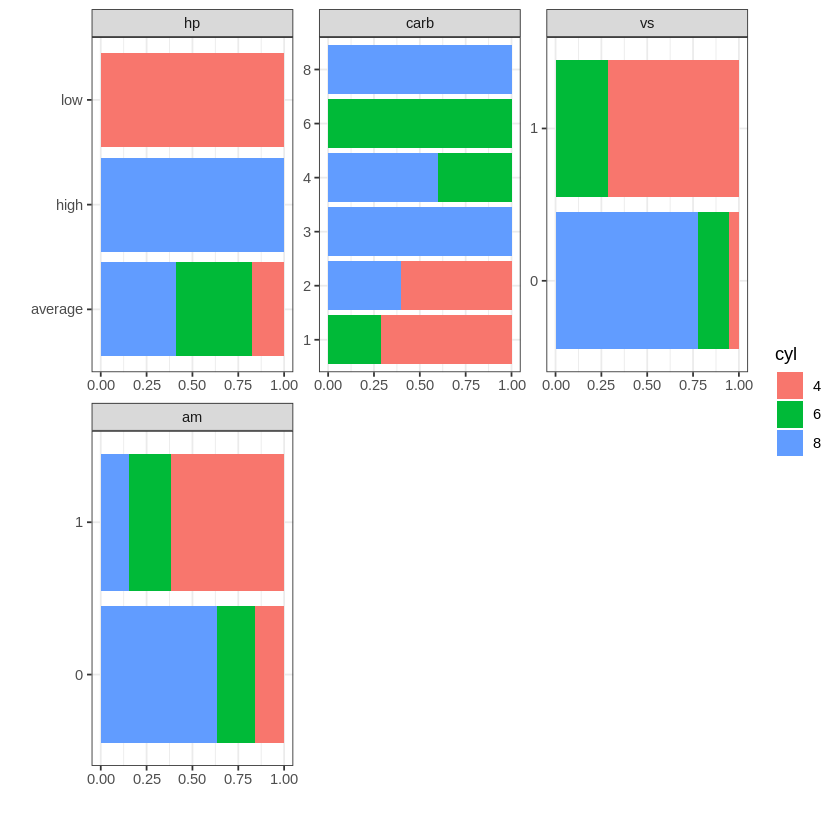

In [65]:
plot_bar(p_df,by ='cyl', order_bar = FALSE,
              ggtheme = theme_bw())

hp에대해 양상관 확인 

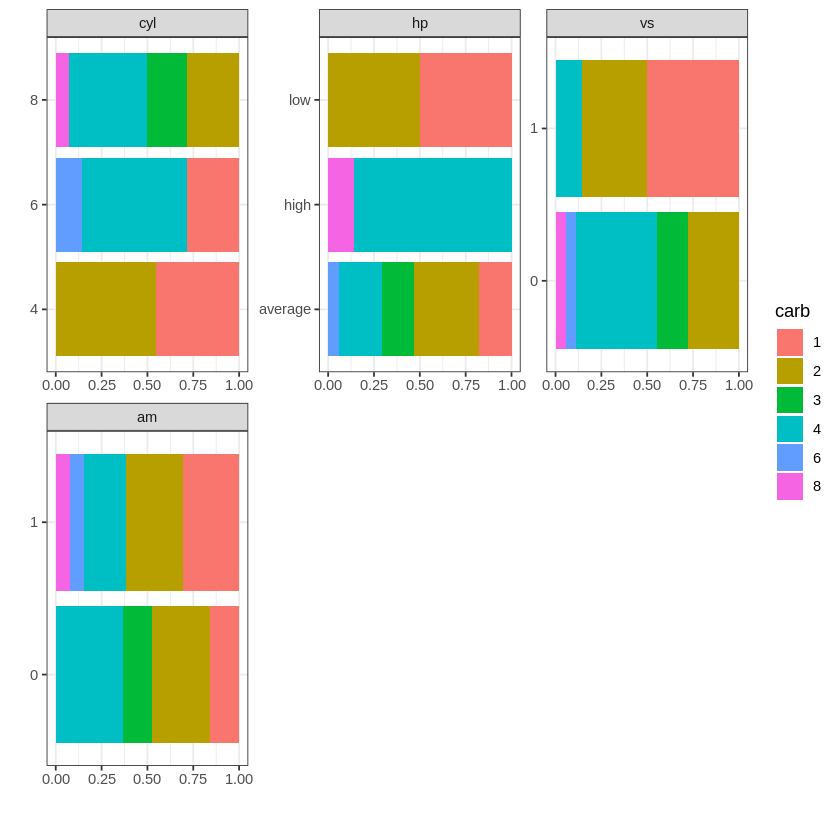

In [67]:
plot_bar(p_df,by ='carb', order_bar = FALSE,
              ggtheme = theme_bw())

In [74]:
# 팩터만 변경
df %>% mutate(
          cyl=as.factor(cyl), 
          carb=as.factor(carb)
             ) -> p_df2

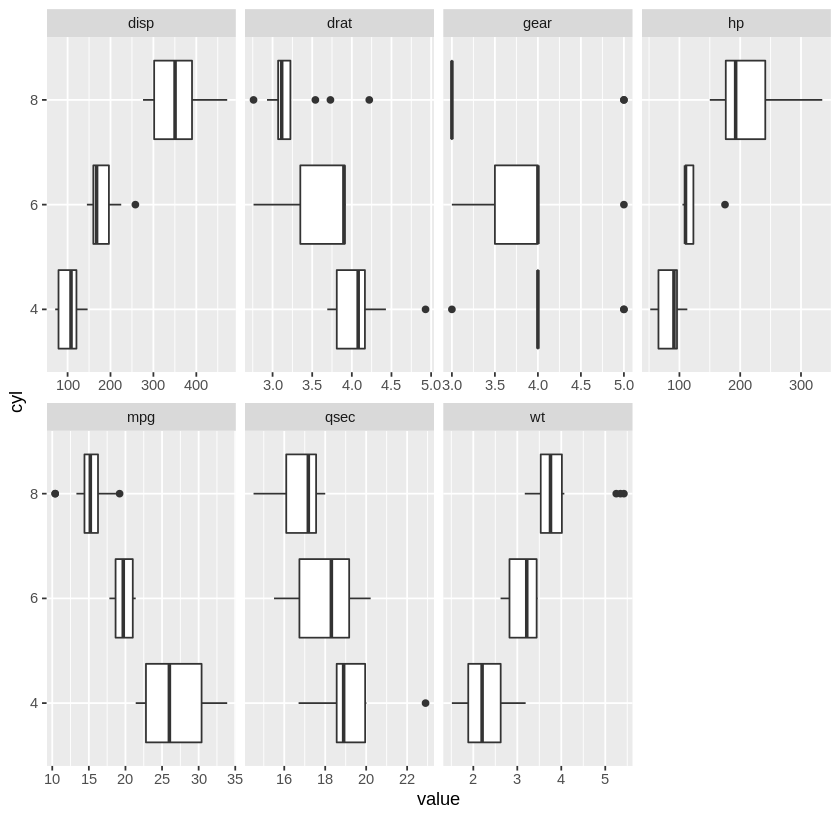

In [75]:
plot_boxplot(p_df2, by="cyl")

양상관/ 음상관 분표 확인 가능<br>
hp에 대해서는 양상관

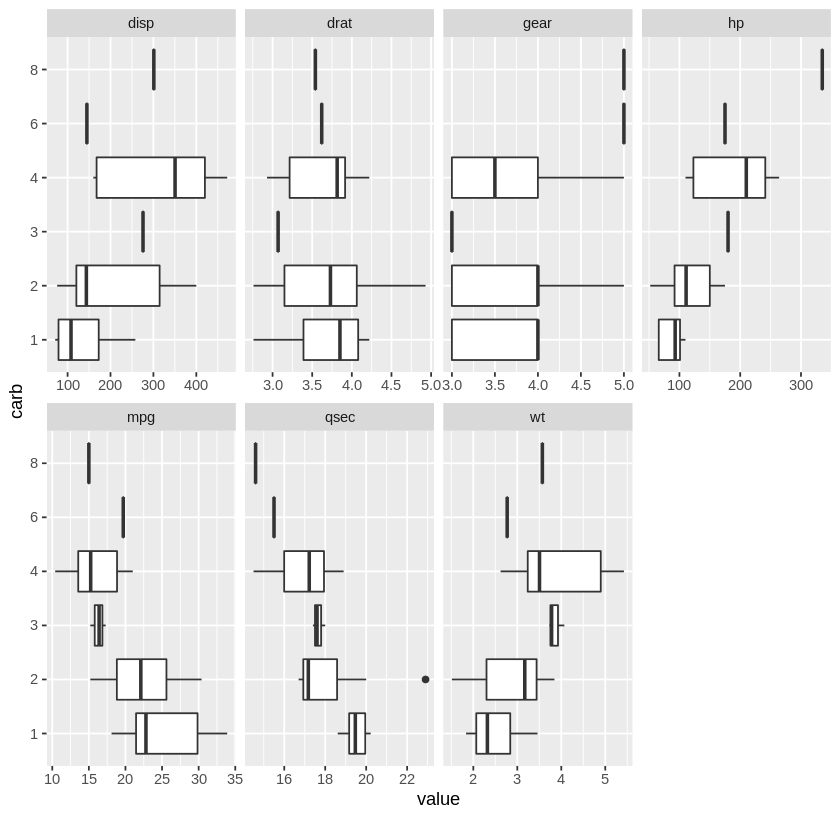

In [76]:
plot_(p_df2, by="carb")

- hp에 대해 변화가 유의미헀다.

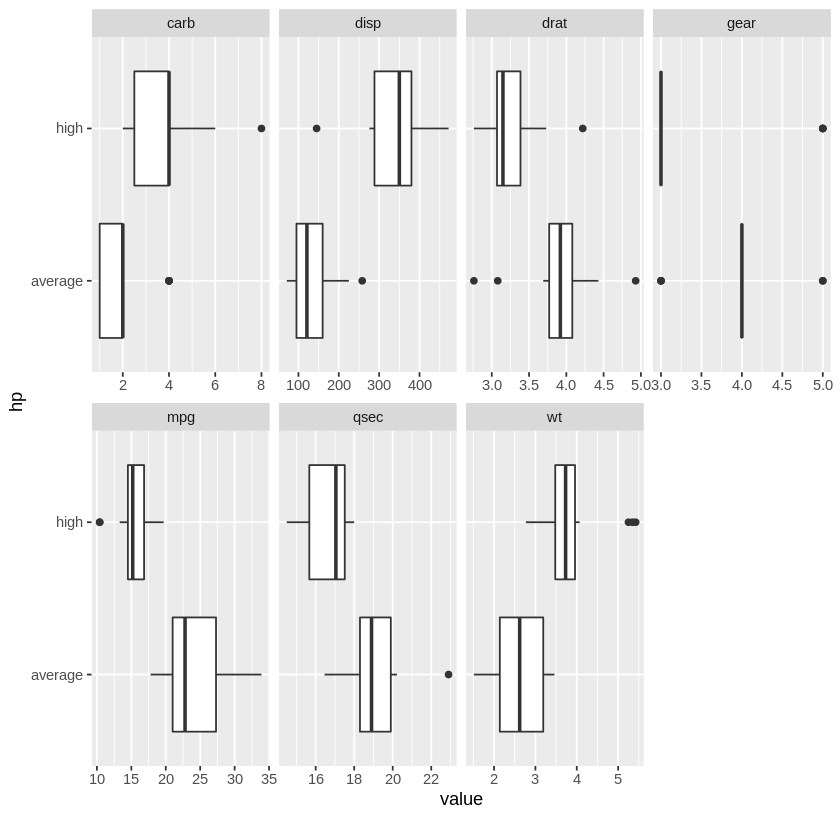

In [47]:
plot_boxplot(p_df, by="hp")

- 상관분석에서 상관계수가 높은 cly, carb 변수를 제외한 나머지 모둔 7개 변수 hp에 영향 미침
- low는 안보임

In [81]:
split_columns(df) %>% str # 모두 con

List of 5
 $ discrete       :'data.frame':	0 obs. of  0 variables
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ continuous     :'data.frame':	32 obs. of  11 variables:
  ..$ mpg : num [1:32] 21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
  ..$ cyl : num [1:32] 6 6 4 6 8 6 8 4 4 6 ...
  ..$ disp: num [1:32] 160 160 108 258 360 ...
  ..$ hp  : num [1:32] 110 110 93 110 175 105 245 62 95 123 ...
  ..$ drat: num [1:32] 3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
  ..$ wt  : num [1:32] 2.62 2.88 2.32 3.21 3.44 ...
  ..$ qsec: num [1:32] 16.5 17 18.6 19.4 17 ...
  ..$ vs  : num [1:32] 0 0 1 1 0 1 0 1 1 1 ...
  ..$ am  : num [1:32] 1 1 1 0 0 0 0 0 0 0 ...
  ..$ gear: num [1:32] 4 4 4 3 3 3 3 4 4 4 ...
  ..$ carb: num [1:32] 4 4 1 1 2 1 4 2 2 4 ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ num_discrete   : int 0
 $ num_continuous : int 11
 $ num_all_missing: int 0


In [82]:
#split_columns(p_df) %>% str 

List of 5
 $ discrete       :'data.frame':	32 obs. of  3 variables:
  ..$ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
  ..$ hp  : chr [1:32] "average" "average" "low" "average" ...
  ..$ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ continuous     :'data.frame':	32 obs. of  8 variables:
  ..$ mpg : num [1:32] 21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
  ..$ disp: num [1:32] 160 160 108 258 360 ...
  ..$ drat: num [1:32] 3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
  ..$ wt  : num [1:32] 2.62 2.88 2.32 3.21 3.44 ...
  ..$ qsec: num [1:32] 16.5 17 18.6 19.4 17 ...
  ..$ vs  : num [1:32] 0 0 1 1 0 1 0 1 1 1 ...
  ..$ am  : num [1:32] 1 1 1 0 0 0 0 0 0 0 ...
  ..$ gear: num [1:32] 4 4 4 3 3 3 3 4 4 4 ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ num_discrete   : int 3
 $ num_continuous : int 8
 $ num_all_missing: int 0


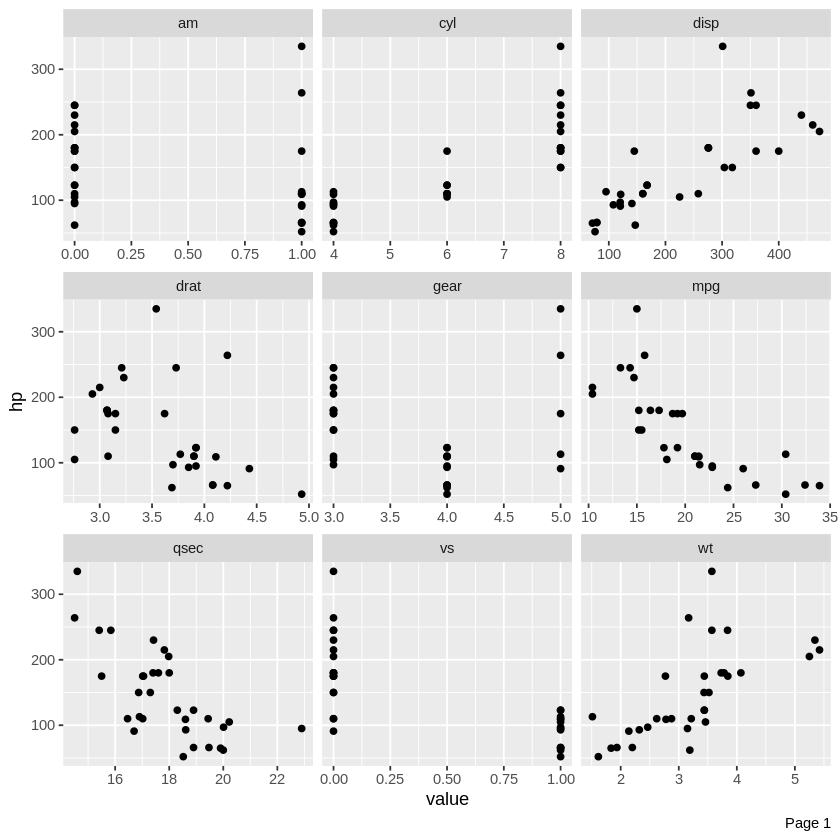

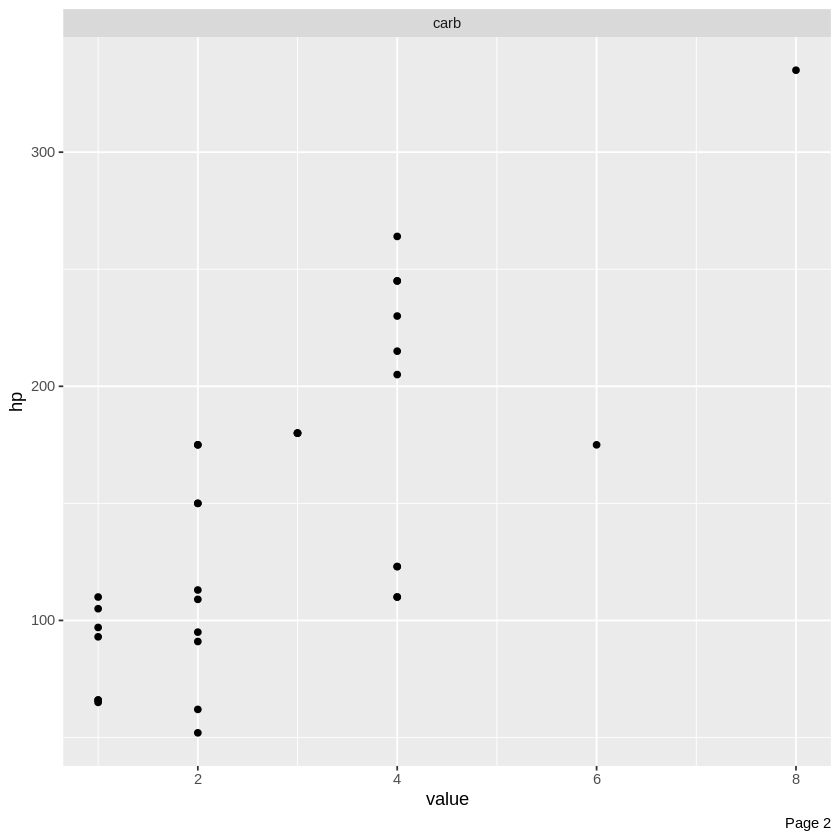

In [83]:
plot_scatterplot(split_columns(df)$continuous,  by = "hp")

- carb 가운데가 비었당
- 상관분석 결과와 같은거 확인

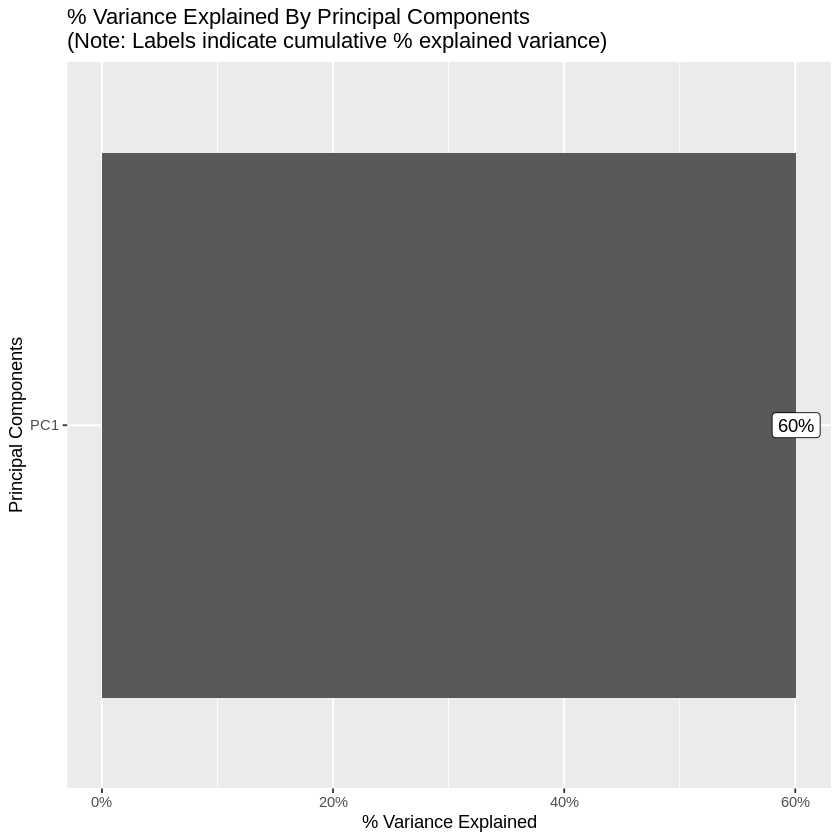

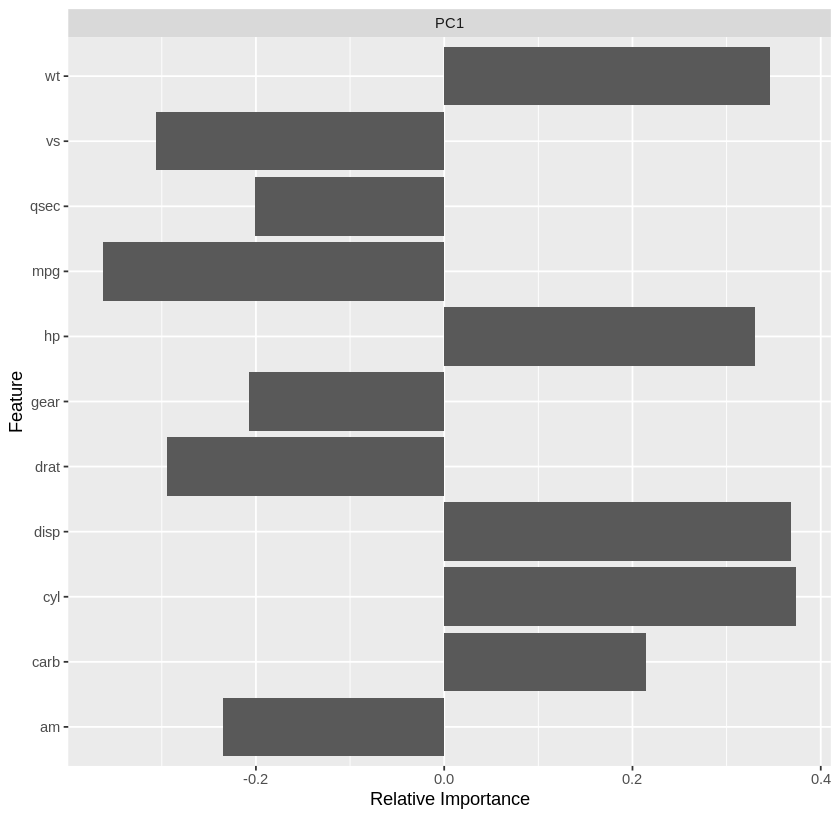

In [85]:
plot_prcomp(df)

- pc1으로 데이터셋을 60%설명가능하고
- 상관분석 결과와 매우 유사하게 나옴 

In [84]:
#?plot_prcomp

# 3. FEATURE ENGINEERING

* 4기통인 자동차의 백분율을 구하시오


In [115]:
#table(df$cyl) %>% prop.table %>% str
table(df$cyl) %>% prop.table -> table

In [125]:
#table[[1]][1]*100
paste("4기통인 자동차의 백분률은","",table[[1]][1]*100,"%")

[1] "4기통인 자동차의 백분률은  34.375 %"

* 변속 기어수가 4이고, 수동 변속기인 데이터에서 자동차 연비의 평균값과 마력의 표준편차의 합계를 구하시오

gear==4, am==1, -> mean(mpg) + sd(hp)

In [127]:
df %>% filter(gear==4 & am==1) %>%
      summarise(mean(mpg) + sd(hp))

mean(mpg) + sd(hp)
<dbl>
50.44959


In [129]:
#민맥스스케일링
#함수생성
min_max_norm<- function(x){
      x-min(x)/(max(x)-min(x))
}
#적용
df %<>% mutate(across(where(is.numeric), ~ min_max_norm(.x)))

# 4. MODELING

In [130]:
glimpse(df) # 확인

Rows: 32
Columns: 11
$ mpg  <dbl> 20.557447, 20.557447, 22.357447, 20.957447, 18.257447, 17.657447,…
$ cyl  <dbl> 5, 5, 3, 5, 7, 5, 7, 3, 3, 5, 5, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 7,…
$ disp <dbl> 159.82265, 159.82265, 107.82265, 257.82265, 359.82265, 224.82265,…
$ hp   <dbl> 109.81625, 109.81625, 92.81625, 109.81625, 174.81625, 104.81625, …
$ drat <dbl> 2.628111, 2.628111, 2.578111, 1.808111, 1.878111, 1.488111, 1.938…
$ wt   <dbl> 2.233142, 2.488142, 1.933142, 2.828142, 3.053142, 3.073142, 3.183…
$ qsec <dbl> 14.73381, 15.29381, 16.88381, 17.71381, 15.29381, 18.49381, 14.11…
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,…
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,…
$ gear <dbl> 2.5, 2.5, 2.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 1.5, 1.5, …
$ carb <dbl> 3.8571429, 3.8571429, 0.8571429, 0.8571429, 1.8571429, 0.8571429,…


In [131]:
fit=lm(hp~., df)

In [132]:
summary(fit)


Call:
lm(formula = hp ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.681 -15.558   0.799  18.106  34.718 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  80.0813   153.4939   0.522  0.60732   
mpg          -2.0631     2.0906  -0.987  0.33496   
cyl           8.2037    10.0861   0.813  0.42513   
disp          0.4390     0.1492   2.942  0.00778 **
drat         -4.6185    16.0829  -0.287  0.77680   
wt          -27.6600    19.2704  -1.435  0.16591   
qsec         -1.7844     7.3639  -0.242  0.81089   
vs           25.8129    19.8512   1.300  0.20758   
am            9.4863    20.7599   0.457  0.65240   
gear          7.2164    14.6160   0.494  0.62662   
carb         18.7487     7.0288   2.667  0.01441 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.97 on 21 degrees of freedom
Multiple R-squared:  0.9028,	Adjusted R-squared:  0.8565 
F-statistic:  19.5 on 10 and 21 DF,  p-value: 

- 잔차진단

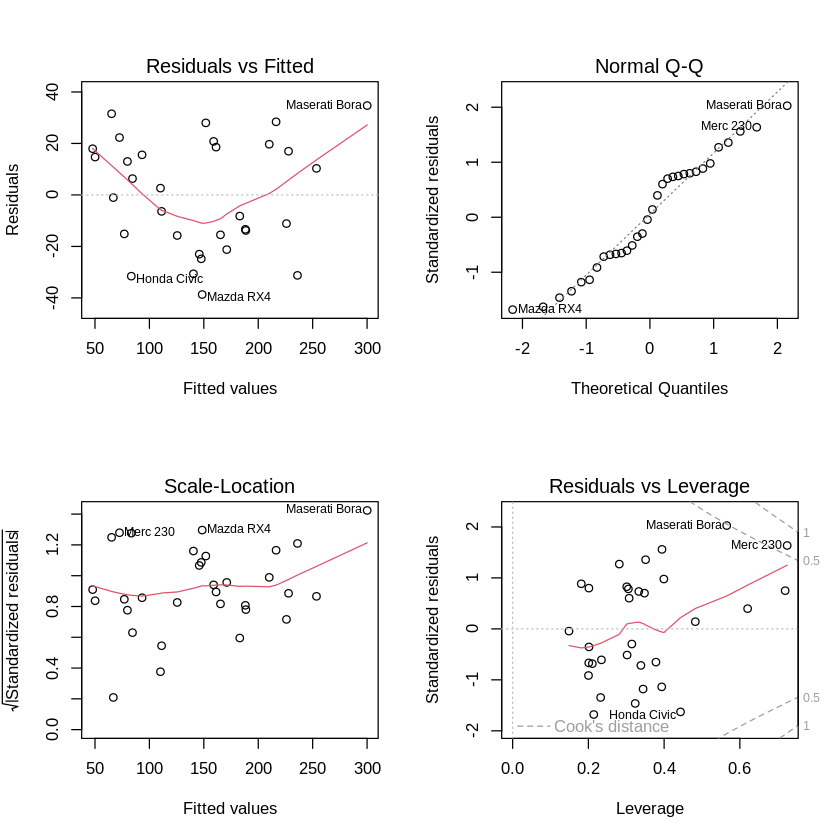

In [135]:
par(mfrow=c(2,2))
plot(fit)

1. 등분산성 만족하지 못함
2. 정규성 만족
3. 핏티드벨루와 표준화잔차 그래프를 바쓸떄 로에스가  ,, 이정도는 ㄱㅊ은지,, 잘 모르겠음 이건
4. 쿡스디스턴스 기준 포텐셜 아웃라이어 존재